In [4]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(123)

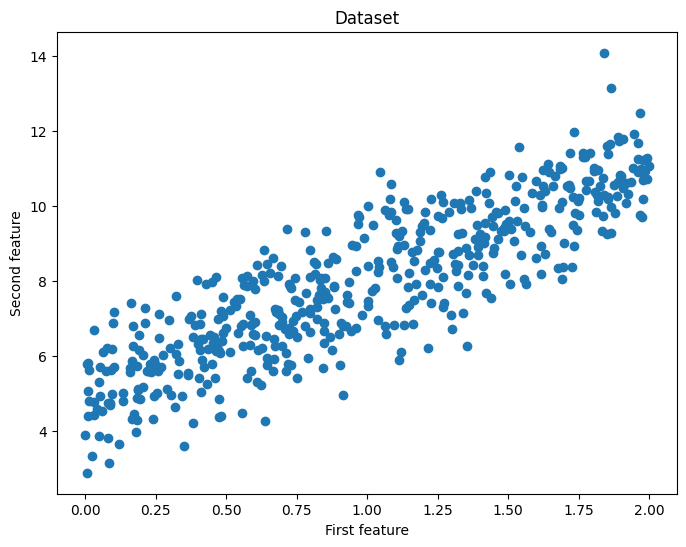

In [6]:
#data set
# We will use a simple training set
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()



In [7]:
#Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y)

print(f"shape X_train: {X_train.shape}")
print(f'shape y_train: {y_train.shape}')
print(f'shape X_test: {X_test.shape}')
print(f'shape y_test: {y_test.shape}')

shape X_train: (375, 1)
shape y_train: (375, 1)
shape X_test: (125, 1)
shape y_test: (125, 1)


In [10]:
#Linear regression class

class LinearRegression:
    def ___init__(self):
        pass

    def train_gradient_descent(self, X, y, learning_rate = 0.01, n_iters = 100):
        """
        Trains a linear regression model using gradient descent.
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape = (n_features, 1))
        self.bias = 0
        costs = []

        for i in range(n_iters):
            # Stepe 1 : Compute a linear comination of the input features and weights
            y_predict = np.dot(X, self.weights) + self.bias

            # Step 2: Compute cost over training set
            cost = (1/n_samples) * np.sum((y_predict - y )**2)
            costs.append(cost)

            if i % 100 == 0:
                print(f"Cost at iteration {i}: {cost}")

            # Step 3: Comute the gradients 
            dJ_dw = (2 / n_samples) * (np.dot(X.T, (y_predict - y)))
            dJ_db = (2 / n_samples) * np.sum((y_predict - y))

            # Step 4: Update the parameters 
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db

        return self.weights, self.bias, costs 
    
    def train_normal_equation(self, X, y):
        """
        Trains a linear regression model using the normal equation.  
        """
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)), X.T), y)
        self.bias = 0

        return self.weights, self.bias
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Cost at iteration 0: 66.45256981003433
Cost at iteration 100: 2.2084346146095934
Cost at iteration 200: 1.2797812854182806
Cost at iteration 300: 1.2042189195356685
Cost at iteration 400: 1.1564867816573


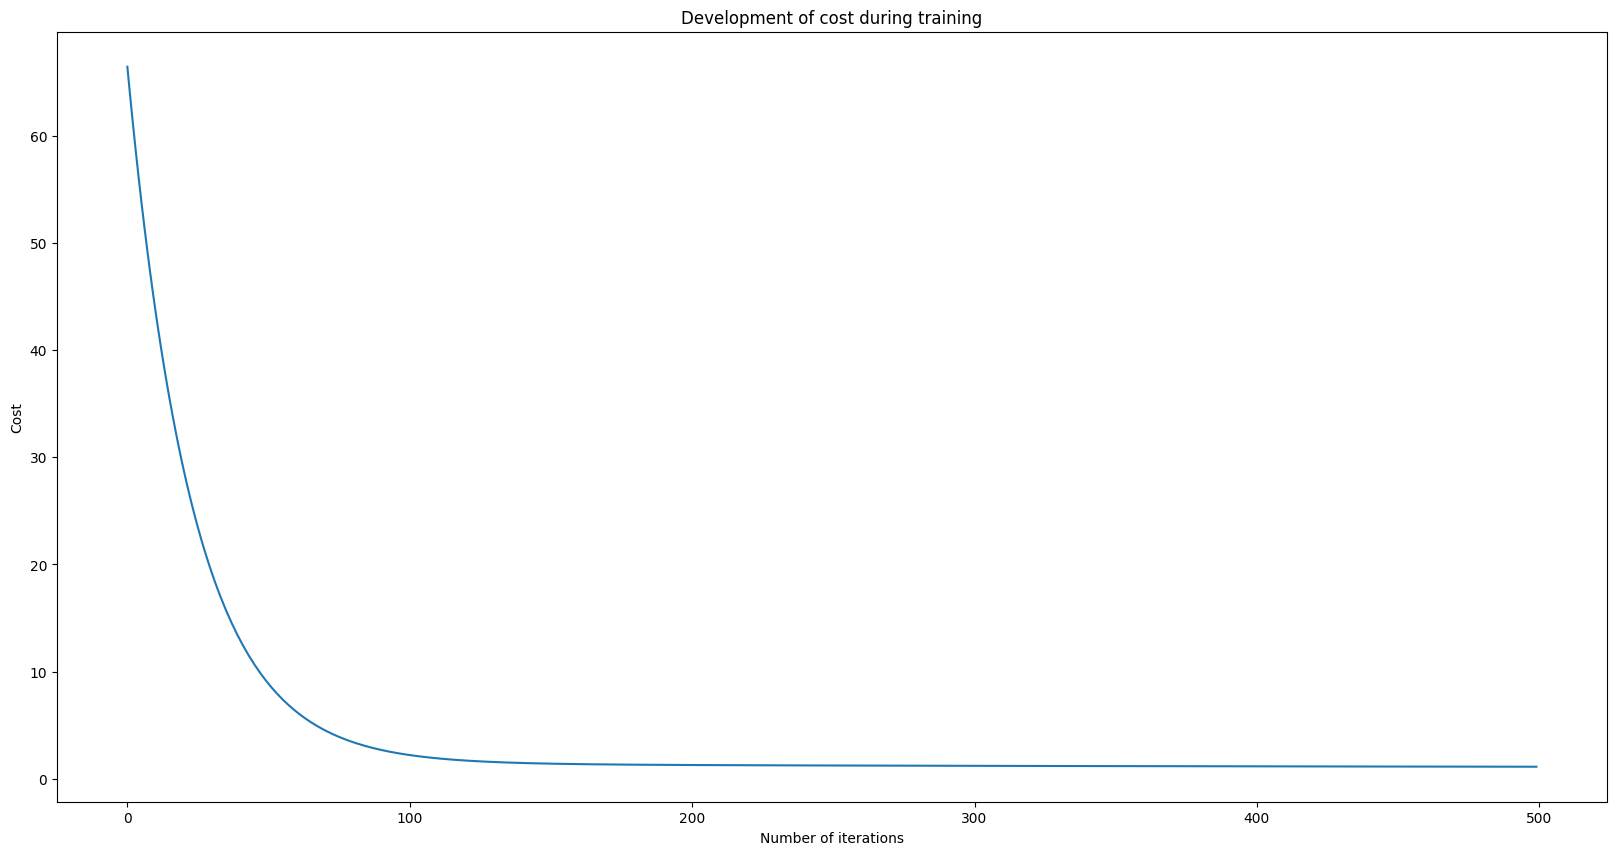

In [12]:
# Training with gradient descent

regressor = LinearRegression()

w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate = 0.005, n_iters = 500)

fig = plt.figure(figsize = (20,10))
plt.plot(np.arange(500), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [13]:
# Testing (gradient descent model)

n_samples , _ = X_train.shape
n_samples_test , _ = X_test.shape

y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

error_train = (1/ n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test = (1/ n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"error on training set: {error_train}")
print(f"error on test set: {error_test}")

error on training set: 1.121391041394467
error on test set: 1.1673408289144884


In [16]:
#Training with normal equation 
# to compute the prameters using the normal equation, we add a bias value of 1 to each inpute example.

X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]

reg_normal = LinearRegression()
w_trained = reg_normal.train_normal_equation(X_b_train, y_train)



In [22]:
# Testing (normal equation model)

y_p_train = reg_normal.predict(X_b_train)
y_p_test = reg_normal.predict(X_b_test)

from sklearn.metrics import mean_squared_error
error_train = mean_squared_error(y_p_train, y_train)
error_test = mean_squared_error(y_p_test, y_test)

print(f'error on train set: {error_train}')
print(f'error on test set : {error_test}')


error on train set: 1.0228140491805378
error on test set : 1.0432342117601157


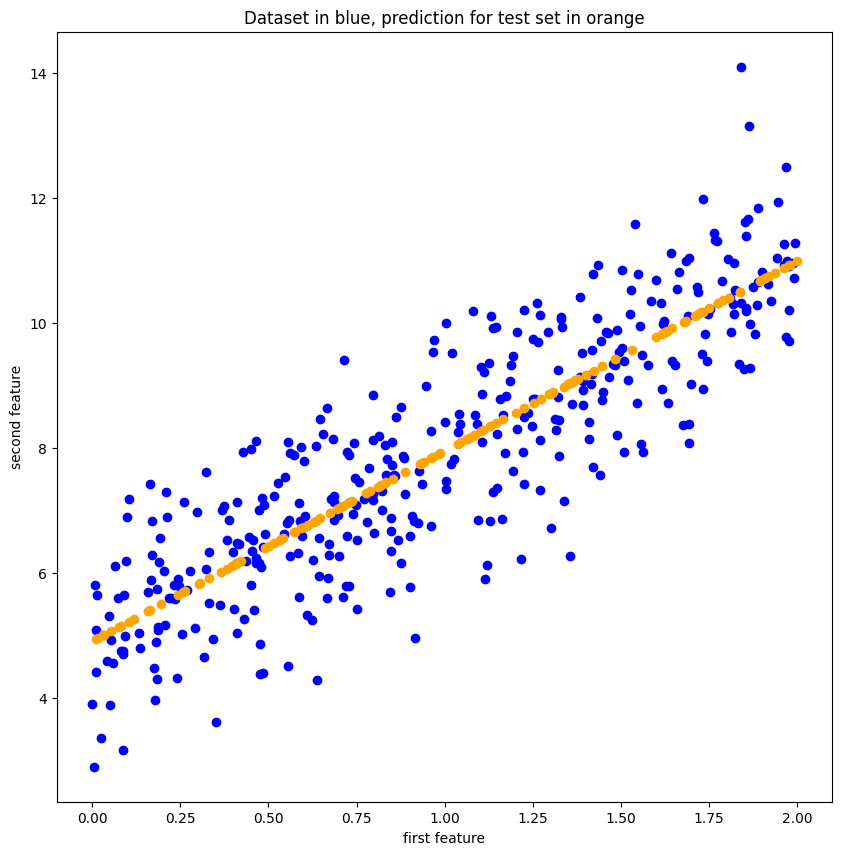

In [23]:
#Visualize test predictions 

# plot the test predictions

fig = plt.figure(figsize = (10,10))
plt.title("Dataset in blue, prediction for test set in orange")
plt.scatter(X_train,y_train,color = "blue")
plt.scatter(X_test,y_p_test,color = "orange")
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()